<a href="https://colab.research.google.com/github/elvajinj/Python-Project/blob/master/Project_TMDb_Movie_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In [0]:
#import data source
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Load data

In [57]:
#1. Load data from data source
df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [58]:
df.shape

(10866, 21)

In [59]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

In [0]:
#check the data type and remove the unnecessary data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [0]:
#drop the unnecessary columns

In [0]:
df.drop(['imdb_id','cast','homepage','tagline','overview','keywords','production_companies','budget_adj','revenue_adj'],axis=1,inplace=True)

In [64]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1018.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3285494a8>,
      dtype=object)

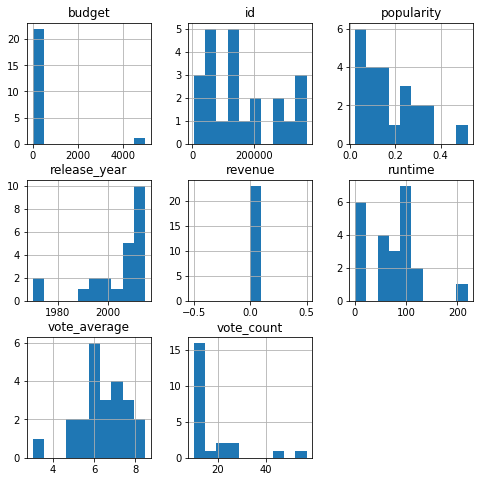

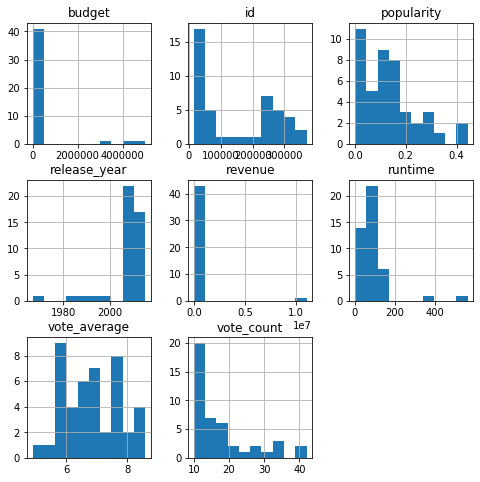

In [66]:
#check missing info
df[df.genres.isnull()].hist(figsize=(8,8))
df[df.director.isnull()].hist(figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd329989898>,
      dtype=object)

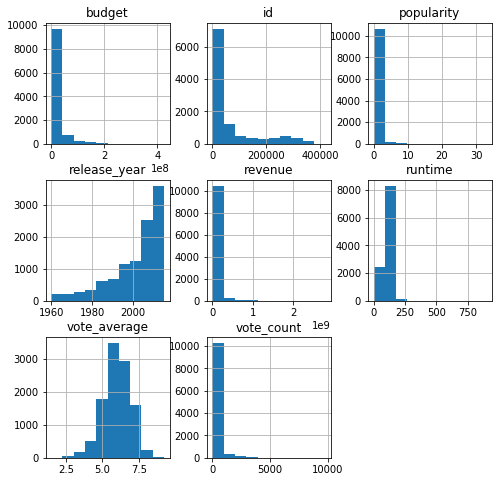

In [67]:
df.hist(figsize=(8,8))

In [68]:
#pull the null data to double check
df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
424,363869,0.244648,0,0,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014
1712,21634,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009
2370,127717,0.081892,0,0,Freshman Father,Michael Scott,0,NaN,6/5/10,12,5.8,2010
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,62,NaN,12/25/10,11,7.7,2010
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012


In [69]:
df[df.genres.isnull()]

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
424,363869,0.244648,0,0,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015
620,361043,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015
997,287663,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014
1712,21634,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009
1897,40534,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009
2370,127717,0.081892,0,0,Freshman Father,Michael Scott,0,NaN,6/5/10,12,5.8,2010
2376,315620,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,62,NaN,12/25/10,11,7.7,2010
2853,57892,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001
3279,54330,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012


In [0]:
#based on the hist, replace the null value with mean value
df.fillna(df.mean(),inplace=True)

In [0]:
df.dropna(inplace=True)

In [72]:
#refresh to check the table info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
id                10801 non-null int64
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
runtime           10801 non-null int64
genres            10801 non-null object
release_date      10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In [73]:
# check relation for each indicator
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


### 1. How's revenue in these years?

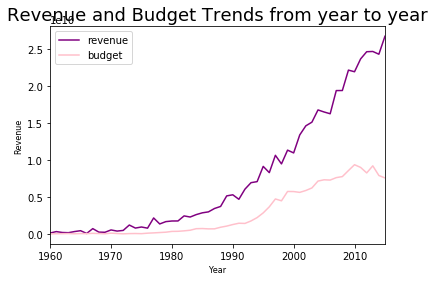

In [74]:
df.groupby(['release_year']).revenue.sum().plot(kind='line',color='purple',label='revenue')
df.groupby(['release_year']).budget.sum().plot(kind='line',color='pink',label='budget')
plt.title('Revenue and Budget Trends from year to year', fontsize = 18)
plt.xlabel('Year', fontsize = 8)
plt.ylabel('Revenue', fontsize = 8)
plt.legend()

### 2. How's the popularity in different levels looks like?

In [75]:
df['popularity'].describe()

count    10801.000000
mean         0.649450
std          1.002395
min          0.000188
25%          0.209163
50%          0.385492
75%          0.717479
max         32.985763
Name: popularity, dtype: float64

In [0]:
# Based on the max and min value of popularity, break down the popularity into 3 different levels

In [0]:
df['popularity_levels'] = pd.cut(df['popularity'], bins=3, labels = ['Low', 'Medium', 'High'])

In [0]:
# check the relationship between popularity levels and budget

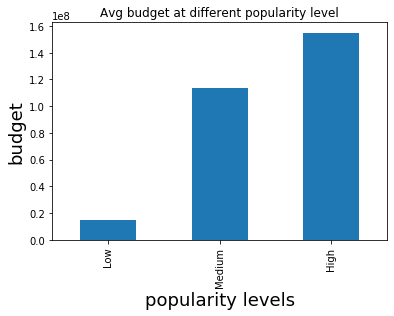

In [79]:
df.groupby('popularity_levels')['budget'].mean().plot(kind='bar')
plt.xlabel('popularity levels',fontsize=18)
plt.ylabel('budget',fontsize=18)
plt.title('Avg budget at different popularity level')
plt.show()

### 3. Which is the top genres for the movies?

In [0]:
def calculate_count(column):
    # Convert column to string and seperate it by '|'
    data = df[column].str.cat(sep = '|')
    # Storing the values seperately in a Pandas series
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [81]:
count = calculate_count('genres')
count.head(10)

Drama              4755
Comedy             3782
Thriller           2905
Action             2379
Romance            1708
Horror             1636
Adventure          1466
Crime              1354
Science Fiction    1224
Family             1223
dtype: int64

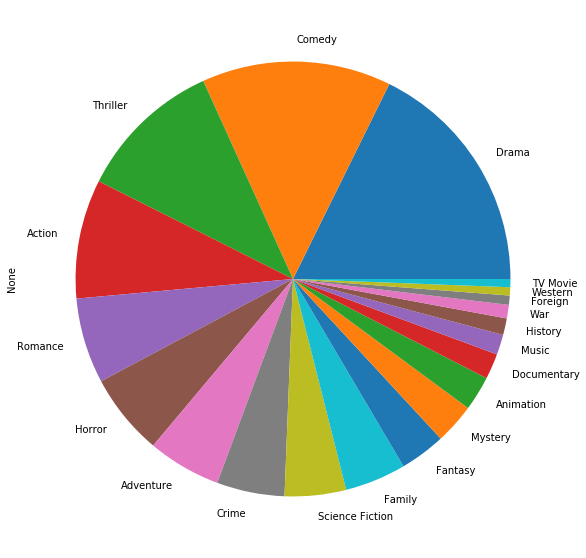

In [82]:
count.plot(kind='pie', figsize = (10, 10));

<a id='conclusions'></a>
## Conclusions



### 1. Relationship between total revenue and year

#### Used line chart to look into the relationship between revenue in the time trend, the reslut shows the total revenue is increasing each year.

### 2. Relationship between popularity and budget

#### Grouped popularity in 3 levels: LOW, MEDIUM, HIGH, and bar chart shows higher popularity, higher budget.

### 3. Genres distribution

#### After count the genres and get the pie chart, it is clear to see the success on Drama.

### Limitations: The analysis is based on replacing over 65 null values by mean, this may cause some bias of the analysis.